# Finite-Length Capacity of the BSC and BEC Channels

This code is provided as supplementary material of the lecture Channel Coding 2 - Advanced Methods.

This code illustrates
* Calculating the finite-length capacity of the BSC and BEC channels using the normal approximation
* Illustrating the finite-length capacity for different code lengths and different error rates

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Binary Symmetric Channel (BSC)

Start with the BSC for which we have
\begin{equation*}
C_\text{BSC} = 1 - h(\delta) = 1+\delta\log_2(\delta)+(1-\delta)\log_2(1-\delta)
\end{equation*}
and
\begin{equation*}
V_\text{BSC} = \delta(1-\delta)\left(\log_2\left(\frac{1-\delta}{\delta}\right)\right)^2
\end{equation*}

In [4]:
# capacity of the BSC
def C_BSC(delta):    
    binary_entropy = -delta*np.log2(delta) - (1-delta)*np.log2(1-delta)
    if delta < 1e-20:
        binary_entropy = 0    
    return 1 - binary_entropy

# dispersion of the BSC
def V_BSC(delta):
    V = np.square(np.log2((1-delta)/delta)) * delta * (1-delta)
    if delta < 1e-20:
        V = 0
    return V

The finite-length capacity for the BSC channel is given by
\begin{equation*}
r = \frac{\log_2(M)}{n} \approx C - \sqrt{\frac{V}{n}}Q^{-1}(P_e) + \frac{\log_2(n)}{2n}
\end{equation*}
We can solve this equation for $P_e$, which gives
\begin{equation*}
P_e \approx Q\left(\frac{n(C-r) + \frac{1}{2}\log_2(n)}{\sqrt{Vn}}\right)
\end{equation*}
For a given channel (i.e., a given $\delta$), we can compute the capacity $C$ and the dispersion $V$ and then use it to get an estimate of what error rate an ideal code with an idea decoder could achieve. Note that this is only an estimate and we do not know the exact value. However, we can compute upper and lower bounds, which are relatively close to the approximation (beyond the scope of this lecture).

In [5]:
def get_Pe_finite_length_BSC(n, r, delta):
    # compute capacity
    C = C_BSC(delta)
    
    # compute dispersion
    V = V_BSC(delta)
    
    # Q-function is "norm.sf" (survival function)
    return norm.sf((n*(C-r) + 0.5*np.log2(n))/np.sqrt(n*V))

Show finite length capacity estimates for some codes of different lengths $n$

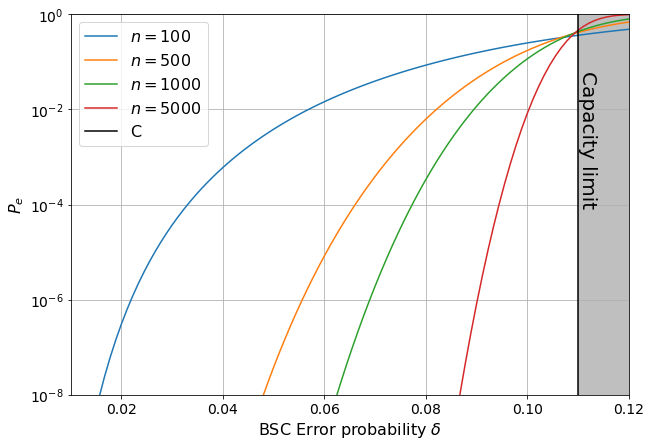

In [6]:
delta_range = np.linspace(0.01,0.12,100)


Pe_BSC_r12_n100 = [get_Pe_finite_length_BSC(100, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n500 = [get_Pe_finite_length_BSC(500, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n1000 = [get_Pe_finite_length_BSC(1000, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n5000 = [get_Pe_finite_length_BSC(5000, 0.5, delta) for delta in delta_range]

fig = plt.figure(1,figsize=(10,7))
plt.semilogy(delta_range, Pe_BSC_r12_n100)
plt.semilogy(delta_range, Pe_BSC_r12_n500)
plt.semilogy(delta_range, Pe_BSC_r12_n1000)
plt.semilogy(delta_range, Pe_BSC_r12_n5000)

plt.axvspan(0.11, 0.12, alpha=0.5, color='gray')
plt.axvline(x=0.11, color='k')
plt.ylim((1e-8,1))
plt.xlim((0.01,0.12))
plt.xlabel('BSC Error probability $\delta$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=500$','$n=1000$', '$n=5000$', 'C'], fontsize=16)
plt.text(0.11, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BSC_Pe_R12.pdf',bbox_inches='tight')

Different representation, for a given channel (and here, we pick $\delta = 0.11$), show the rate the code should at most have to allow for decoding with an error rate $P_e$ (here we specify different $P_e$) if a certain length $n$ is available.

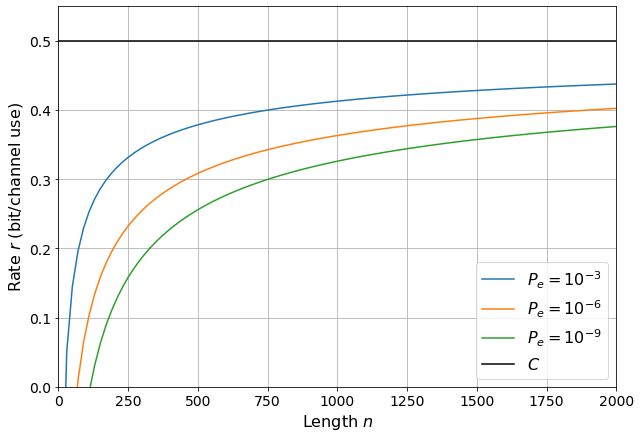

In [7]:
#specify \delta
delta = 0.11

n_range = np.linspace(10,2000,100)


C = C_BSC(delta)
V = V_BSC(delta)

r_Pe_1em3 = [C - np.sqrt(V/n)*norm.isf(1e-3) + 0.5*np.log2(n)/n for n in n_range]
r_Pe_1em6 = [C - np.sqrt(V/n)*norm.isf(1e-6) + 0.5*np.log2(n)/n for n in n_range]
r_Pe_1em9 = [C - np.sqrt(V/n)*norm.isf(1e-9) + 0.5*np.log2(n)/n for n in n_range]

fig = plt.figure(1,figsize=(10,7))
plt.plot(n_range, r_Pe_1em3)
plt.plot(n_range, r_Pe_1em6)
plt.plot(n_range, r_Pe_1em9)
plt.axhline(y=C, color='k')
plt.ylim((0,0.55))
plt.xlim((0,2000))
plt.xlabel('Length $n$', fontsize=16)
plt.ylabel('Rate $r$ (bit/channel use)', fontsize=16)
plt.legend(['$P_e = 10^{-3}$', '$P_e = 10^{-6}$','$P_e = 10^{-9}$', '$C$'], fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BSC_r_delta_011.pdf',bbox_inches='tight')

***
## Binary Erasure Channel (BEC)

For the BEC, we have
\begin{equation*}
C_\text{BEC} = 1 - \epsilon
\end{equation*}
and
\begin{equation*}
V_\text{BEC} = \epsilon(1-\epsilon)
\end{equation*}

In [8]:
# capacity of the BSC
def C_BEC(epsilon):    
    return 1 - epsilon

# dispersion of the BSC
def V_BEC(epsilon):
    return epsilon*(1-epsilon)

The finite-length capacity for the BEC channel is given by (note, here we do not use the correction term)
\begin{equation*}
r = \frac{\log_2(M)}{n} \approx C - \sqrt{\frac{V}{n}}Q^{-1}(P_e)
\end{equation*}
We can solve this equation for $P_e$, which gives
\begin{equation*}
P_e \approx Q\left(\frac{\sqrt{n}(C-r)}{\sqrt{V}}\right)
\end{equation*}
For a given channel (i.e., a given $\epsilon$), we can compute the capacity $C$ and the dispersion $V$ and then use it to get an estimate of what error rate an ideal code with an idea decoder could achieve. Note that this is only an estimate and we do not know the exact value. However, we can compute upper and lower bounds, which are relatively close to the approximation (beyond the scope of this lecture).

In [9]:
def get_Pe_finite_length_BEC(n, r, epsilon):
    # compute capacity
    C = C_BEC(epsilon)
    
    # compute dispersion
    V = V_BEC(epsilon)
     
    # Q-function is "norm.sf" (survival function)
    return norm.sf((n*(C-r))/np.sqrt(n*V))

Show finite length capacity estimates for some codes of different lengths $n$

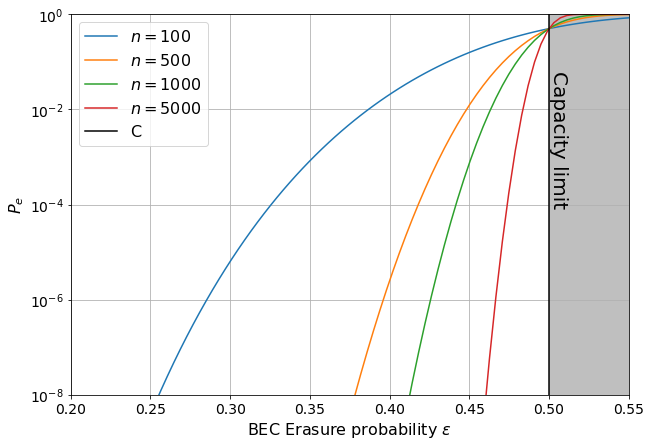

In [10]:
epsilon_range = np.linspace(0.2,0.6,100)


Pe_BEC_r12_n100 = [get_Pe_finite_length_BEC(100, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n500 = [get_Pe_finite_length_BEC(500, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n1000 = [get_Pe_finite_length_BEC(1000, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n5000 = [get_Pe_finite_length_BEC(5000, 0.5, epsilon) for epsilon in epsilon_range]

fig = plt.figure(1,figsize=(10,7))
plt.semilogy(epsilon_range, Pe_BEC_r12_n100)
plt.semilogy(epsilon_range, Pe_BEC_r12_n500)
plt.semilogy(epsilon_range, Pe_BEC_r12_n1000)
plt.semilogy(epsilon_range, Pe_BEC_r12_n5000)

plt.axvspan(0.5, 0.55, alpha=0.5, color='gray')
plt.axvline(x=0.5, color='k')
plt.ylim((1e-8,1))
plt.xlim((0.2,0.55))
plt.xlabel('BEC Erasure probability $\epsilon$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=500$','$n=1000$', '$n=5000$', 'C'], fontsize=16)
plt.text(0.5, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BEC_Pe_R12.pdf',bbox_inches='tight')

Different representation, for a given channel (and here, we pick $\epsilon = 0.5$), show the rate the code should at most have to allow for decoding with an error rate $P_e$ (here we specify different $P_e$) if a certain length $n$ is available.

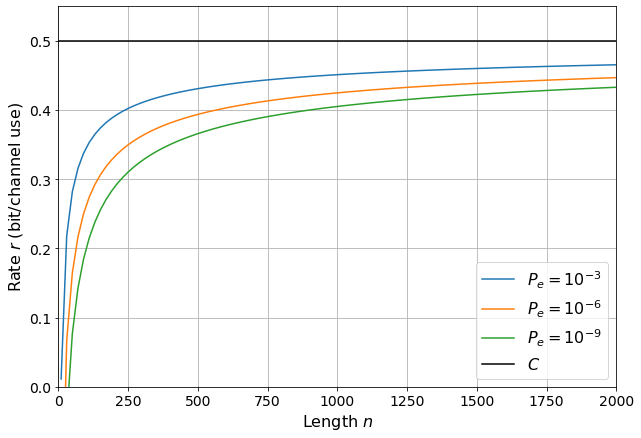

In [11]:
#specify \epsilon
epsilon = 0.5

n_range = np.linspace(10,2000,100)


C = C_BEC(epsilon)
V = V_BEC(epsilon)

r_Pe_1em3 = [C - np.sqrt(V/n)*norm.isf(1e-3) for n in n_range]
r_Pe_1em6 = [C - np.sqrt(V/n)*norm.isf(1e-6) for n in n_range]
r_Pe_1em9 = [C - np.sqrt(V/n)*norm.isf(1e-9) for n in n_range]

fig = plt.figure(1,figsize=(10,7))
plt.plot(n_range, r_Pe_1em3)
plt.plot(n_range, r_Pe_1em6)
plt.plot(n_range, r_Pe_1em9)
plt.axhline(y=C, color='k')
plt.ylim((0,0.55))
plt.xlim((0,2000))
plt.xlabel('Length $n$', fontsize=16)
plt.ylabel('Rate $r$ (bit/channel use)', fontsize=16)
plt.legend(['$P_e = 10^{-3}$', '$P_e = 10^{-6}$','$P_e = 10^{-9}$', '$C$'], fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BEC_r_epsilon_05.pdf',bbox_inches='tight')

---

## Extra Material, Random Coding Union Bound for the BSC
We now additionally show the Random Coding Union (RCU) bound [2, Th. 16] for the BSC, as it is a fairly easy to calculate the bound in this case. The RCU bound is not part of the lecture and shown here for completeness. 

To get the RCU bound, we assume that we perform ML decoding of the random code with $\boldsymbol{x}^{[1]}$ transmitted. We assume that the channel introduces a total number of $t$ errors. Then let $E_m$ denote the event that codeword $\boldsymbol{x}^{[m]}$ is within a sphere of radius $t$ around the received word $\boldsymbol{Y}$. In this case, if any event $E_m$ with $m \geq 2$ occurs, we may make a decoding error (if more than a single codeword which can include $\boldsymbol{x}^{[1]}$ are within this sphere, we may randomly select one and pick $\boldsymbol{x}^{[1]}$ by chance. Hence, the error probability can be bounded as
\begin{align*}
P(\text{decoding error} | \boldsymbol{Y}, t\text{ errors}) &\leq P\left(\bigcup_{m=2}^M E_m \bigg| \boldsymbol{Y}, t\text{ errors}\right) \\
&\stackrel{(a)}{\leq} \sum_{m=2}^M P\left(E_m | \boldsymbol{Y}, t\text{ errors}\right) \\
&= (M-1)\cdot P\left(E_2 | \boldsymbol{Y}, t\text{ errors}\right) \\
&\leq M\cdot P\left(E_2 | \boldsymbol{Y}, t\text{ errors}\right) \\
&\stackrel{(b)}{=} M \sum_{j=0}^t\binom{n}{j}\left(\frac{1}{2}\right)^n \\
&= 2^{-n(1-r)}\sum_{j=0}^t\binom{n}{j}
\end{align*}
where $(a)$ is the union bound and $(b)$ is due to the fact that the probability of choosing a certain codeword is $(\frac12)^n = 2^{-n}$ and there are a total number of $\sum_{j=0}^t\binom{n}{t}$ possible codewords around $\boldsymbol{Y}$ (each chosen with probability $2^{-n}$.

The main trick of [2] is now to observe that the union bound can be often loose and $2^{-n(1-r)}\sum_{j=0}^t\binom{n}{j}$ can become larger than 1. Hence, [2] introduced the tighter bound
\begin{equation*}
P(\text{decoding error} | \boldsymbol{Y}, t\text{ errors}) \leq \min\left(1, 2^{-n(1-r)}\sum_{j=0}^t\binom{n}{j}\right) 
\end{equation*}

The total probability of error is then obtained by noticing that the errors in the BSC follow a binomial distribution, and we we can state that
\begin{align*}
P_e &= \sum_{t=0}^n\binom{n}{t}\delta^t(1-\delta)^{n-t}P(\text{decoding error} | \boldsymbol{Y}, t\text{ errors}) \\
&\leq \sum_{t=0}^n\binom{n}{t}\delta^t(1-\delta)^{n-t} \min\left(1, 2^{-n(1-r)}\sum_{j=0}^t\binom{n}{j}\right) 
\end{align*}
The bound states that for the BSC with error probability $\delta$, there exists a code (the random code) with $M$ codewords of length $n$ (and rate $r = \frac{\log_2(M)}{n}$) that has an error probability upper bounded by the above bound under ML decoding.

[2] Y. Polyanskiy, H. V. Poor and S. Verdú, "Channel coding rate in the finite blocklength regime," _IEEE Trans. Inf. Theory_ , vol. 56, no. 5, pp. 2307-2359, May 2010

In [12]:
from scipy.special import comb

def get_Pe_RCU_BSC(n, r, delta):
    binomials = [comb(n,t,exact=False) for t in range(n+1)]
          
    return np.sum([binomials[t] * (delta**t) * ((1-delta)**(n-t)) * min(1, np.sum([binomials[j] for j in range(t+1)]) * 2**(-n*(1-r)))  for t in range(n+1)])

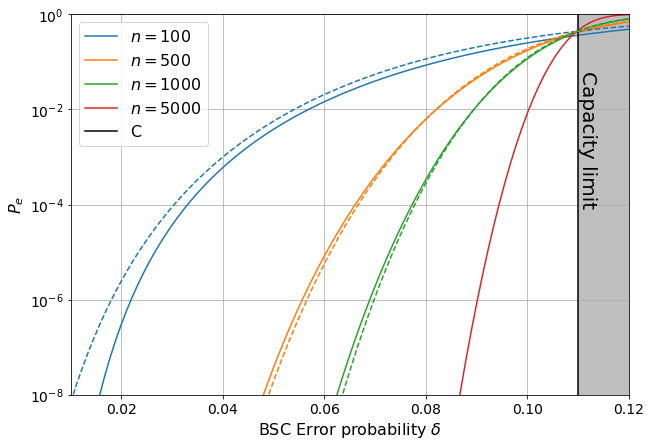

In [13]:
delta_range = np.linspace(0.01,0.12,100)


Pe_BSC_r12_n100 = [get_Pe_finite_length_BSC(100, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n500 = [get_Pe_finite_length_BSC(500, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n1000 = [get_Pe_finite_length_BSC(1000, 0.5, delta) for delta in delta_range]
Pe_BSC_r12_n5000 = [get_Pe_finite_length_BSC(5000, 0.5, delta) for delta in delta_range]

Pe_RCU_BSC_r12_n100 = [get_Pe_RCU_BSC(100, 0.5, delta) for delta in delta_range]
Pe_RCU_BSC_r12_n500 = [get_Pe_RCU_BSC(500, 0.5, delta) for delta in delta_range]
Pe_RCU_BSC_r12_n1000 = [get_Pe_RCU_BSC(1000, 0.5, delta) for delta in delta_range]

fig = plt.figure(1,figsize=(10,7))
plt.semilogy(delta_range, Pe_BSC_r12_n100)
plt.semilogy(delta_range, Pe_BSC_r12_n500)
plt.semilogy(delta_range, Pe_BSC_r12_n1000)
plt.semilogy(delta_range, Pe_BSC_r12_n5000)

plt.axvline(x=0.11, color='k')

plt.gca().set_prop_cycle(None)

#d ashed curves represnt the RCU bound
plt.semilogy(delta_range, Pe_RCU_BSC_r12_n100, '--')
plt.semilogy(delta_range, Pe_RCU_BSC_r12_n500, '--')
plt.semilogy(delta_range, Pe_RCU_BSC_r12_n1000, '--')


plt.axvspan(0.11, 0.12, alpha=0.5, color='gray')

plt.ylim((1e-8,1))
plt.xlim((0.01,0.12))
plt.xlabel('BSC Error probability $\delta$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=500$','$n=1000$', '$n=5000$', 'C'], fontsize=16)
plt.text(0.11, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BSC_Pe_R12.pdf',bbox_inches='tight')

---

## Extra Material, Random Coding Union Bound for the BEC
We now additionally show the Random Coding Union (RCU) bound [2, Th. 16] for the BEC, as it is a fairly easy to calculate the bound in this case. The RCU bound is not part of the lecture and shown here for completeness. 

To get the RCU bound, we assume that we perform ML decoding of the random code with $\boldsymbol{x}^{[1]}$ transmitted. We assume that the channel introduces a total number of $t$ erasures. At the non-erased positions, the bits have been received correctly. Then let $E_m$ denote the event that codeword $\boldsymbol{x}^{[m]}$ has the same code bits at the __non__-erased positions as $\boldsymbol{x}^{[1]}$. In this case, the decoder cannot make a decision which codeword to select (they have the same likelihood). It can resolve this tie by randomly selecting a codeword, which may produce a decoding error. Hence, the error probability can be bounded as
\begin{align*}
P(\text{decoding error} | \boldsymbol{Y}, t\text{ erasures}) &\leq P\left(\bigcup_{m=2}^M E_m | \boldsymbol{Y}, t\text{ erasures}\right) \\
&\stackrel{(a)}{\leq} \sum_{m=2}^M P\left(E_m | \boldsymbol{Y}, t\text{ erasures}\right) \\
&= (M-1)\cdot P\left(E_2 | \boldsymbol{Y}, t\text{ erasures}\right) \\
&\leq M\cdot P\left(E_2 | \boldsymbol{Y}, t\text{ erasures}\right) \\
&\stackrel{(b)}{=} M\left(\frac{1}{2}\right)^{n-t} \\
&= 2^{-n(1-r)+t}
\end{align*}
where $(a)$ is the union bound and $(b)$ is due to the fact that the probability of choosing $n-t$ positions that are identical to $\boldsymbol{x}^{[1]}$ in these positions is $(\frac12)^{n-t} = 2^{t-n}$.

The main trick of [2] is now to observe that the union bound can be often loose and $2^{-n(1-r)+t}$ can become larger than 1. Hence, [2] introduced the tighter bound
\begin{equation*}
P(\text{decoding error} | \boldsymbol{Y}, t\text{ erasures}) \leq \min\left(1, 2^{-n(1-r)+t}\right) 
\end{equation*}

The total probability of error is then obtained by noticing that the erasures in the BEC follow a binomial distribution, and we we can state that
\begin{align*}
P_e &= \sum_{t=0}^n\binom{n}{t}\epsilon^t(1-\epsilon)^{n-t}P(\text{decoding error} | \boldsymbol{Y}, t\text{ erasures}) \\
&\leq \sum_{t=0}^n\binom{n}{t}\epsilon^t(1-\epsilon)^{n-t} \min\left(1, 2^{-n(1-r)+t}\right) 
\end{align*}
The bound states that for the BEC with erasure probability $\epsilon$, there exists a code (the random code) with $M$ codewords of length $n$ (and rate $r = \frac{\log_2(M)}{n}$) that has an error probability upper bounded by the above bound under ML decoding.

[2] Y. Polyanskiy, H. V. Poor and S. Verdú, "Channel coding rate in the finite blocklength regime," _IEEE Trans. Inf. Theory_ , vol. 56, no. 5, pp. 2307-2359, May 2010

In [14]:
def get_Pe_RCU_BEC(n, r, epsilon):         
    return np.sum([comb(n,t,exact=True) * (epsilon**t) * ((1-epsilon)**(n-t)) * min(1,  2**(-n*(1-r)+t))  for t in range(n+1)])

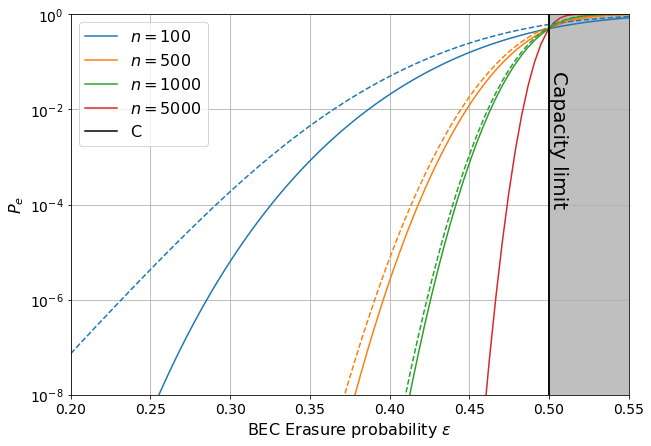

In [15]:
epsilon_range = np.linspace(0.2,0.6,100)


Pe_BEC_r12_n100 = [get_Pe_finite_length_BEC(100, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n500 = [get_Pe_finite_length_BEC(500, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n1000 = [get_Pe_finite_length_BEC(1000, 0.5, epsilon) for epsilon in epsilon_range]
Pe_BEC_r12_n5000 = [get_Pe_finite_length_BEC(5000, 0.5, epsilon) for epsilon in epsilon_range]


Pe_RCU_BEC_r12_n100 = [get_Pe_RCU_BEC(100, 0.5, epsilon) for epsilon in epsilon_range]
Pe_RCU_BEC_r12_n500 = [get_Pe_RCU_BEC(500, 0.5, epsilon) for epsilon in epsilon_range]
Pe_RCU_BEC_r12_n1000 = [get_Pe_RCU_BEC(1000, 0.5, epsilon) for epsilon in epsilon_range]
    

fig = plt.figure(1,figsize=(10,7))
plt.semilogy(epsilon_range, Pe_BEC_r12_n100)
plt.semilogy(epsilon_range, Pe_BEC_r12_n500)
plt.semilogy(epsilon_range, Pe_BEC_r12_n1000)
plt.semilogy(epsilon_range, Pe_BEC_r12_n5000)
plt.axvline(x=0.5, color='k')

plt.gca().set_prop_cycle(None)
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n100, '--')
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n500, '--')
plt.semilogy(epsilon_range, Pe_RCU_BEC_r12_n1000, '--')



plt.axvspan(0.5, 0.55, alpha=0.5, color='gray')
plt.axvline(x=0.5, color='k')
plt.ylim((1e-8,1))
plt.xlim((0.2,0.55))
plt.xlabel('BEC Erasure probability $\epsilon$', fontsize=16)
plt.ylabel('$P_e$', fontsize=16)
plt.legend(['$n = 100$', '$n=500$','$n=1000$', '$n=5000$', 'C'], fontsize=16)
plt.text(0.5, 1e-4, 'Capacity limit', {'color': 'k', 'fontsize': 20, 'rotation': -90})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
#plt.savefig('BEC_Pe_R12.pdf',bbox_inches='tight')